# 📊 Malaria Dataset Analysis

This notebook provides an exploratory analysis of the Malaria HCM/LCM dataset, including image distribution across splits and modalities.

> 📚 For more information: [filter_learning_framework](https://github.com/andreolli-davide/filter_learning_framework)

## 1. Setup & Load Dataset
Import libraries, download (if needed) and load the dataset.

In [1]:
import kagglehub
from pathlib import Path
from src.dataset import Dataset

DATASET_PATH: Path = Path("resources/dataset")

if not DATASET_PATH or not DATASET_PATH.exists():
    dataset_path = Path(
        kagglehub.dataset_download(
            "davidesenette/malaria-hcm-lcm-1000",
        )
    )
dataset = Dataset.load_from_directory(DATASET_PATH)

print(f"Dataset loaded from: {DATASET_PATH}")
print(f"Total samples: {len(dataset.samples)}")

Loading samples from disk: 2514sample [00:00, 5467.62sample/s]

Dataset loaded from: resources/dataset
Total samples: 2514


## 2. Sample Images
Display example images from both HCM (High Content Microscopy) and LCM (Low Content Microscopy) modalities.

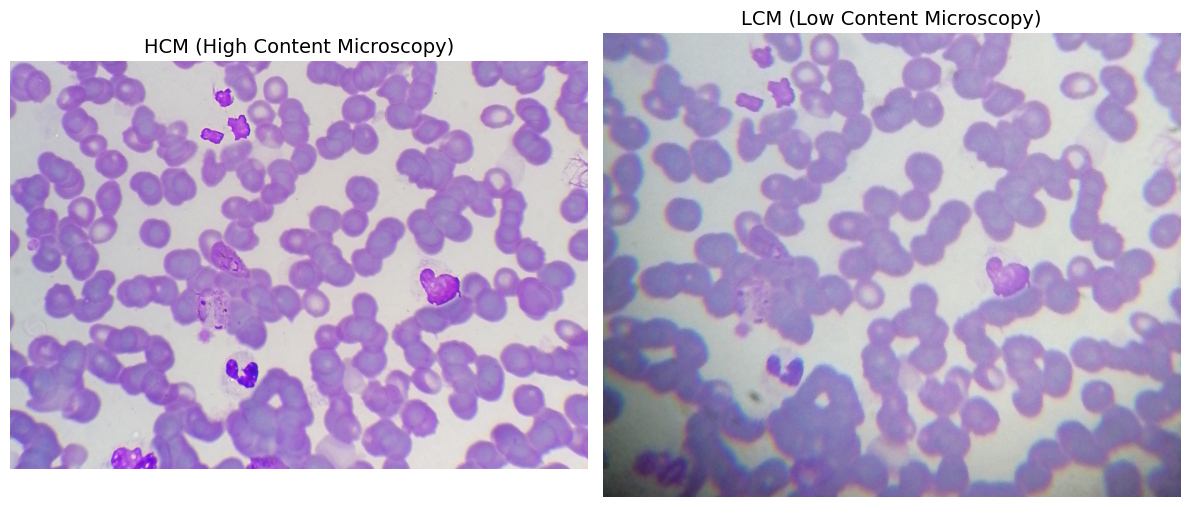

In [2]:
from src.dataset import Magnitude
from matplotlib import pyplot as plt

# Get one sample from each modality
sample_hcm = dataset.pick_random_samples(sample_count=1, magnitude=Magnitude.HCM).pop()
sample_lcm = next(
    (
        sample
        for sample in dataset.samples
        if sample.image_path.stem == sample_hcm.image_path.stem
    ),
    None,
)

assert (
    sample_lcm is not None
), "Matching LCM sample not found for the selected HCM sample."

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(sample_hcm.load_image()[:, :, ::-1])  # BGR to RGB
axes[0].set_title("HCM (High Content Microscopy)", fontsize=14)
axes[0].axis("off")

axes[1].imshow(sample_lcm.load_image()[:, :, ::-1])  # BGR to RGB
axes[1].set_title("LCM (Low Content Microscopy)", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 3. Dataset Statistics
Count images per split (train/val/test) for each modality.

In [3]:
from src.dataset import DatasetSplit
from src.dataset import Magnitude

num_images = {mod: {} for mod in Magnitude}
total_images = {mod: 0 for mod in Magnitude}

for modality in Magnitude:
    for split in DatasetSplit:
        samples = dataset.pick_random_samples(magnitude=modality, split=split)
        count = len(samples)
        num_images[modality][split.value] = count
        total_images[modality] += count


print(f"Total HCM images: {total_images[Magnitude.HCM]}")
print(f"Total LCM images: {total_images[Magnitude.LCM]}")

Total HCM images: 1257
Total LCM images: 1257


## 4. Visualization: HCM vs LCM Distribution
Compare total image counts between modalities.

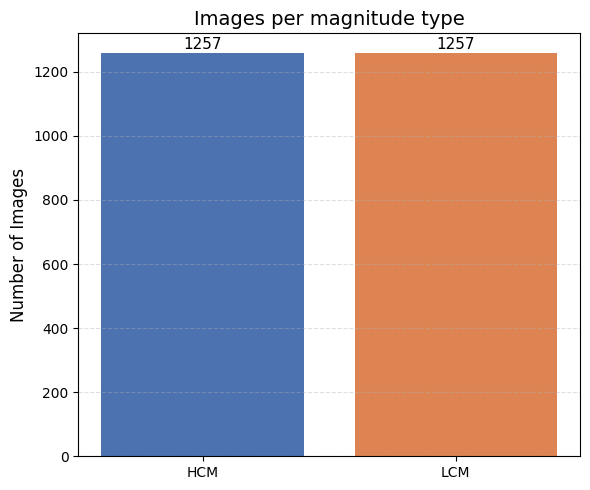

In [4]:
values = [total_images[Magnitude.HCM], total_images[Magnitude.LCM]]

fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(
    [modality.value.upper() for modality in Magnitude],
    values,
    color=["#4C72B0", "#DD8452"],
)

ax.set_title("Images per magnitude type", fontsize=14)
ax.set_ylabel("Number of Images", fontsize=12)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,
        str(height),
        ha="center",
        va="bottom",
        fontsize=11,
    )

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## 5. Visualization: Split Distribution
Compare image counts across train/val/test splits for each modality.

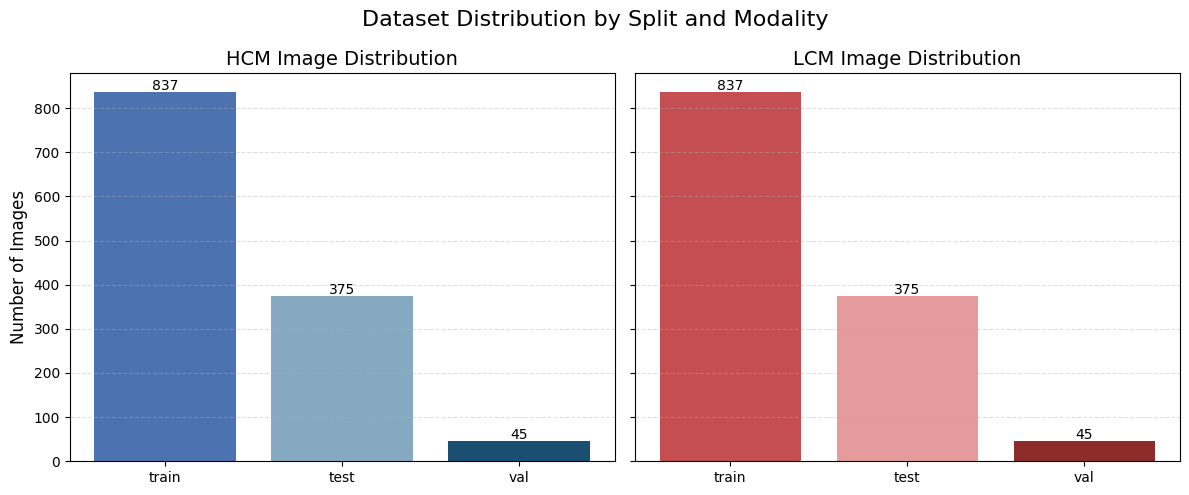

In [5]:
values_hcm = [num_images[Magnitude.HCM][s] for s in DatasetSplit]
values_lcm = [num_images[Magnitude.LCM][s] for s in DatasetSplit]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# HCM subplot
ax = axes[0]
bars_hcm = ax.bar(
    [s.value for s in DatasetSplit], values_hcm, color=["#4C72B0", "#84A9C0", "#1B4F72"]
)
ax.set_title("HCM Image Distribution", fontsize=14)
ax.set_ylabel("Number of Images", fontsize=12)
for bar in bars_hcm:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h + 5, str(h), ha="center", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# LCM subplot
ax = axes[1]
bars_lcm = ax.bar(
    [s.value for s in DatasetSplit], values_lcm, color=["#C44E52", "#E59A9D", "#8E2C2C"]
)
ax.set_title("LCM Image Distribution", fontsize=14)
for bar in bars_lcm:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h + 5, str(h), ha="center", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.4)

fig.suptitle("Dataset Distribution by Split and Modality", fontsize=16)
plt.tight_layout()
plt.show()